# WOCE temperature/salinity sections

In [1]:
from pathlib import Path

import xarray as xr

fname = Path("woce_atlantic_slice.nc")
url = "http://icdc.cen.uni-hamburg.de/thredds/dodsC/ftpthredds/woce/wghc_params.nc"

if not fname.exists():
    ds = xr.open_dataset(url)
    ds = ds[["TPOTEN", "SIG0", "SALINITY"]]
    ds = ds.sel(LON=334)
    ds.to_netcdf(fname)
else:
    ds = xr.open_dataset(fname)

ds

<xarray.Dataset>
Dimensions:   (ZAX: 44, LAT: 341)
Coordinates:
    LON       float64 ...
  * LAT       (LAT) float64 -80.0 -79.5 -79.0 -78.5 ... 88.5 89.0 89.5 90.0
  * ZAX       (ZAX) float64 0.0 10.0 20.0 30.0 ... 5.25e+03 5.5e+03 5.75e+03
Data variables:
    TPOTEN    (ZAX, LAT) float32 ...
    SIG0      (ZAX, LAT) float32 ...
    SALINITY  (ZAX, LAT) float32 ...
Attributes:
    history:      FERRET V6.62  23-Dec-10
    title:        WOCE Global Hydrographic Climatology Parameters
    Conventions:  CF-1.0

In [2]:
import matplotlib.pyplot as plt


def plot_section(ds, varname, cmap, vmin=None, vmax=None):
    y = ds.cf["Y"]
    z = ds.cf["Z"]

    fig, ax = plt.subplots(figsize=(19, 7.25))
    cs = ax.pcolormesh(y, z, ds[varname], cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_ylim(0, 5000)
    ax.set_xlim(-60, 60)
    ax.invert_yaxis()
    ax.set_ylabel("depth (m)")
    ax.set_xlabel("latitude (degrees)")

    fig.colorbar(cs, orientation="vertical", shrink=0.95, fraction=0.15, extend="both")

    levels = [24.5, 25, 26, 26.5, 27, 27.5]
    clabel = ax.contour(y, z, ds["SIG0"], colors="w", levels=levels)
    ax.clabel(clabel, fmt=r"%.1f")

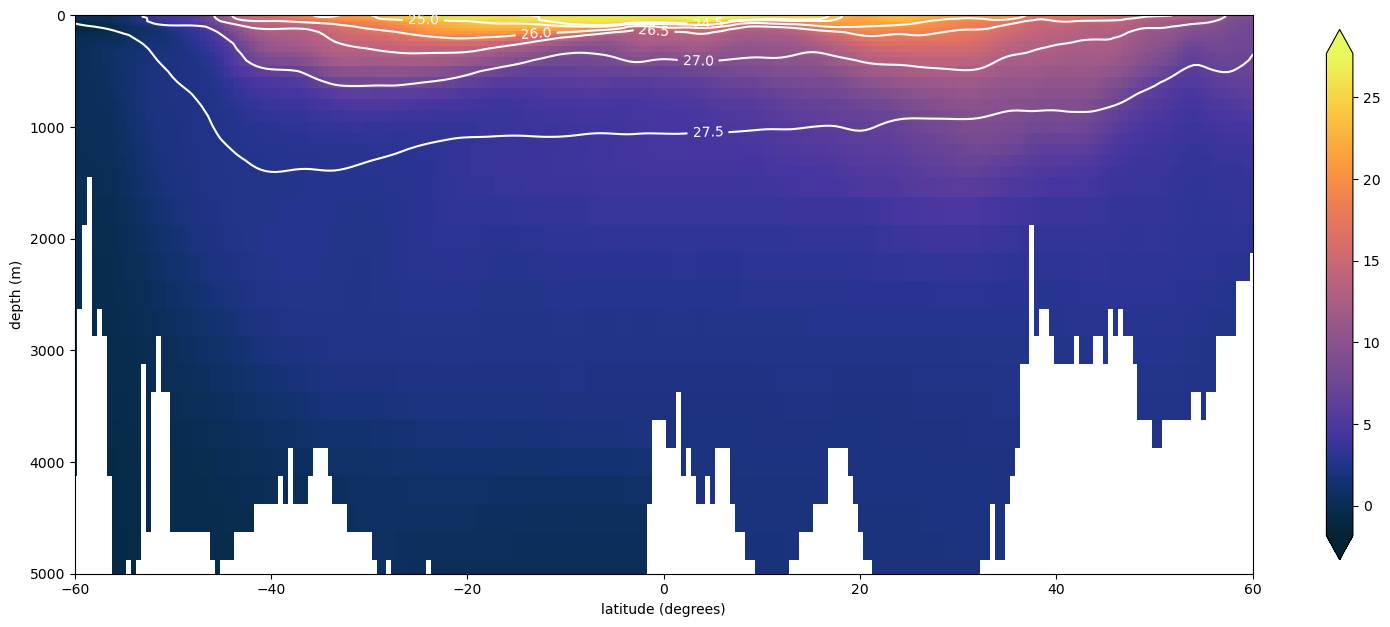

In [3]:
import palettable

cmap = palettable.cmocean.sequential.Thermal_20.mpl_colormap
plot_section(ds, varname="TPOTEN", cmap=cmap)

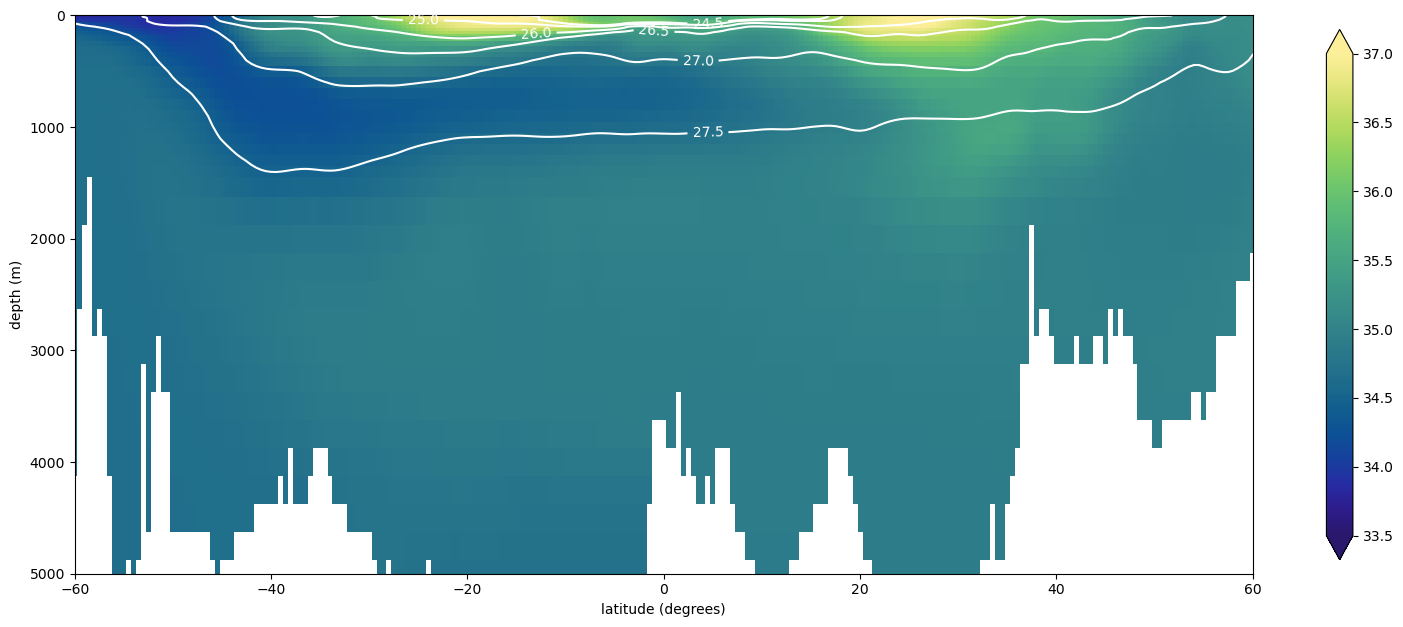

In [4]:
cmap = palettable.cmocean.sequential.Haline_20.mpl_colormap
plot_section(ds, varname="SALINITY", cmap=cmap, vmin=33.5, vmax=37)

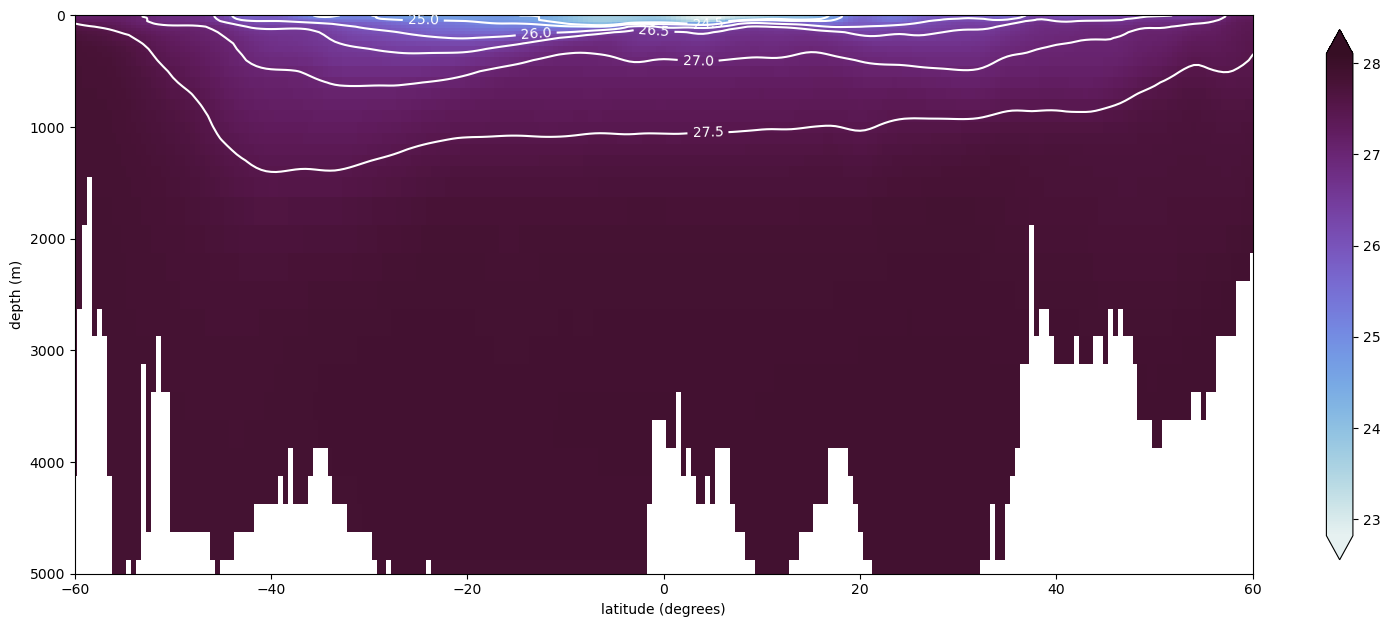

In [5]:
cmap = palettable.cmocean.sequential.Dense_20.mpl_colormap
plot_section(ds, varname="SIG0", cmap=cmap)